## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Import Dataset

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Penjelasan Field-Field pada Dataset
###### RI: refractive index
###### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
###### Mg: Magnesium
###### Al: Aluminum
###### Si: Silicon
###### K: Potassium
###### Ca: Calcium
###### Ba: Barium
###### Fe: Iron
###### Type of glass: (class attribute)
###### -- 1 buildingwindowsfloatprocessed 
###### -- 2 buildingwindowsnonfloatprocessed 
###### -- 3 vehiclewindowsfloatprocessed
###### -- 4 vehiclewindowsnonfloatprocessed (none in this database)
###### -- 5 containers
###### -- 6 tableware
###### -- 7 headlamps

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Menentukan X value dan y value

In [5]:
X = df.drop(['Type'], axis=1)
y = df['Type']

In [6]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

## Normalisasi X value menggunakan Standard Scaler

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

## Pembagian X_train, X_test, y_train dan y_test menggunakan train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Random Forest

In [11]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
rf_model.score(X_test, y_test)

0.7441860465116279

In [13]:
rf_predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
cm

array([[16,  2,  1,  0,  0,  0],
       [ 1,  9,  0,  0,  1,  1],
       [ 3,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

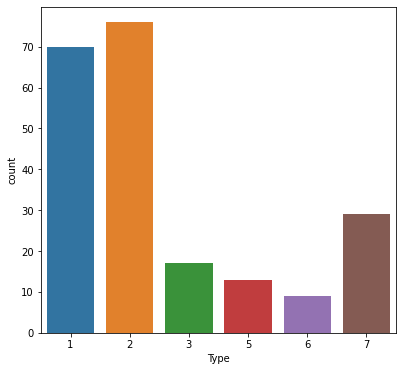

In [14]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Type', data = df)
plt.show()